In [413]:
import pandas as pd
import seaborn as sns

In [414]:
# Load Excel file dan semua sheet
file_path = "Customer_Churn_Data_Large.xlsx"  # ganti dengan nama file kamu
xls = pd.ExcelFile(file_path)

In [415]:
# Load setiap sheet
df_demo = pd.read_excel(xls, 'Customer_Demographics')
df_trans = pd.read_excel(xls, 'Transaction_History')
df_service = pd.read_excel(xls, 'Customer_Service')
df_online = pd.read_excel(xls, 'Online_Activity')
df_status = pd.read_excel(xls, 'Churn_Status')

In [416]:
# Merge semua dataframe berdasarkan CustomerID
df_merged = df_demo.merge(df_trans, on='CustomerID', how='left') \
                   .merge(df_service, on='CustomerID', how='left') \
                   .merge(df_online, on='CustomerID', how='left') \
                   .merge(df_status, on='CustomerID', how='left') 

In [417]:
# Cek hasil gabungan
print(df_merged.head())

   CustomerID  Age Gender MaritalStatus IncomeLevel  TransactionID  \
0           1   62      M        Single         Low           7194   
1           2   65      M       Married         Low           7250   
2           2   65      M       Married         Low           9660   
3           2   65      M       Married         Low           2998   
4           2   65      M       Married         Low           1228   

  TransactionDate  AmountSpent ProductCategory  InteractionID InteractionDate  \
0      2022-03-27       416.50     Electronics         6363.0      2022-03-31   
1      2022-08-08        54.96        Clothing         3329.0      2022-03-17   
2      2022-07-25       197.50     Electronics         3329.0      2022-03-17   
3      2022-01-25       101.31       Furniture         3329.0      2022-03-17   
4      2022-07-24       397.37        Clothing         3329.0      2022-03-17   

  InteractionType ResolutionStatus LastLoginDate  LoginFrequency ServiceUsage  \
0         I

In [418]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [419]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = ['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory', 'InteractionType', 'ResolutionStatus', 'ServiceUsage']

for col in cols_to_encode:
    df_merged[col] = le.fit_transform(df_merged[col].astype(str))

In [420]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   int32         
 3   MaritalStatus     6812 non-null   int32         
 4   IncomeLevel       6812 non-null   int32         
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   int32         
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   6812 non-null   int32         
 12  ResolutionStatus  6812 non-null   int32         
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [421]:
df_merged.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,1,2,1,7194,2022-03-27,416.50,2,6363.0,2022-03-31,2,0,2023-10-21,34,0,0
1,2,65,1,1,1,7250,2022-08-08,54.96,1,3329.0,2022-03-17,2,0,2023-12-05,5,2,1
2,2,65,1,1,1,9660,2022-07-25,197.50,2,3329.0,2022-03-17,2,0,2023-12-05,5,2,1
3,2,65,1,1,1,2998,2022-01-25,101.31,3,3329.0,2022-03-17,2,0,2023-12-05,5,2,1
4,2,65,1,1,1,1228,2022-07-24,397.37,1,3329.0,2022-03-17,2,0,2023-12-05,5,2,1


In [422]:
print(df_merged.describe())

        CustomerID          Age       Gender  MaritalStatus  IncomeLevel  \
count  6812.000000  6812.000000  6812.000000    6812.000000  6812.000000   
mean    500.169260    43.274516     0.474457       1.517763     0.988990   
min       1.000000    18.000000     0.000000       0.000000     0.000000   
25%     247.000000    30.000000     0.000000       0.000000     0.000000   
50%     505.500000    44.000000     0.000000       2.000000     1.000000   
75%     750.000000    56.000000     1.000000       3.000000     2.000000   
max    1000.000000    69.000000     1.000000       3.000000     2.000000   
std     286.704642    15.286788     0.499384       1.154543     0.822187   

       TransactionID                TransactionDate  AmountSpent  \
count    6812.000000                           6812  6812.000000   
mean     5497.323253  2022-07-01 02:11:29.136817408   251.620527   
min      1000.000000            2022-01-01 00:00:00     5.180000   
25%      3223.500000            2022-04-02 

In [423]:
# check missing value
print(df_merged.isnull().sum())

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
TransactionID          0
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionID       1608
InteractionDate     1608
InteractionType        0
ResolutionStatus       0
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64


In [424]:
# Handling missing value use Flagging
# Flag apakah ada interaksi
df_merged['HasInteraction'] = df_merged['InteractionID'].notnull().astype(int)

# Isi nilai kategori default
df_merged['InteractionType'] = df_merged['InteractionType'].fillna('No Interaction')
df_merged['ResolutionStatus'] = df_merged['ResolutionStatus'].fillna('No Case')

# for date, fill with default date 
df_merged['InteractionDate'] = pd.to_datetime(df_merged['InteractionDate'], errors='coerce')


In [425]:
df_merged.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6807    False
6808    False
6809    False
6810    False
6811    False
Length: 6812, dtype: bool

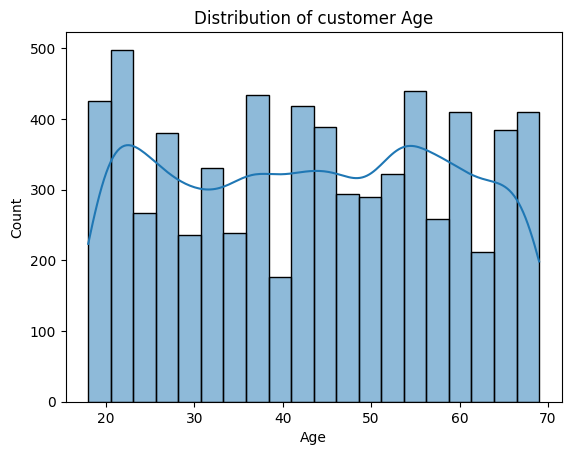

In [426]:
import matplotlib.pyplot as plt

# check distribution customer age
sns.histplot(df_merged['Age'], bins=20, kde=True)
plt.title("Distribution of customer Age")
plt.show()

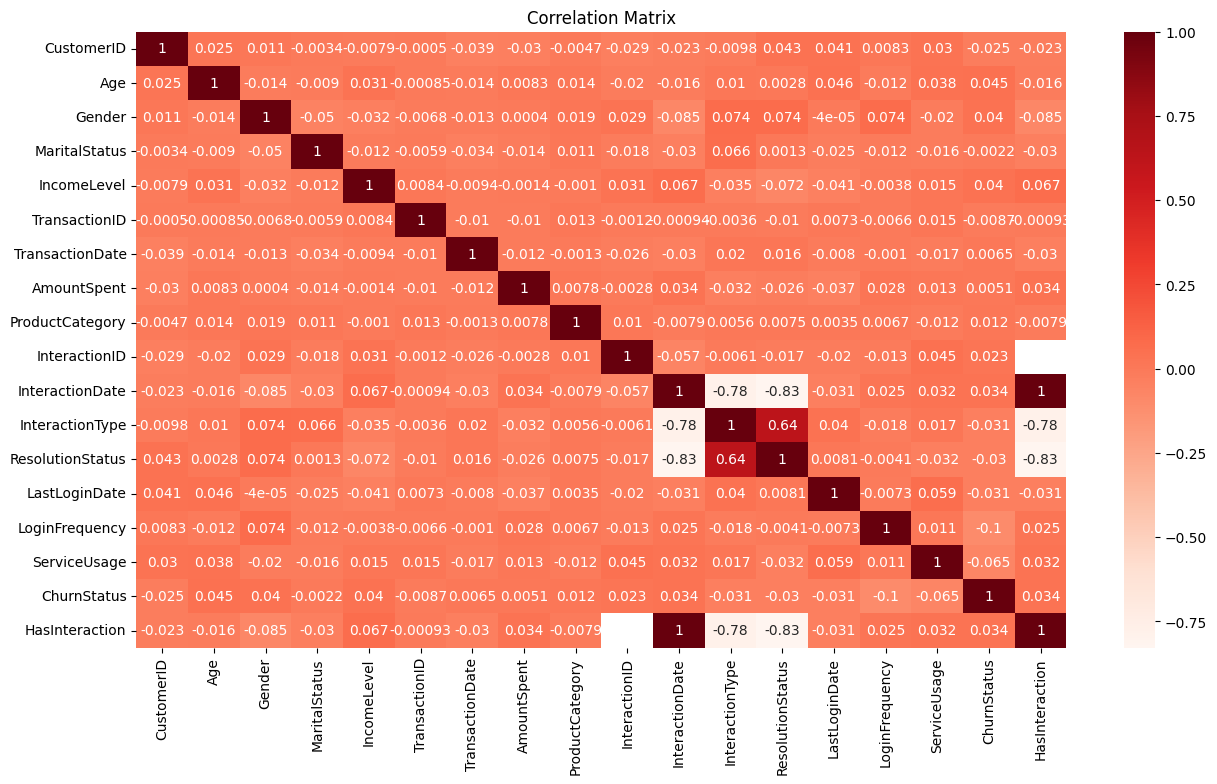

In [427]:
# Correlation Matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_merged.corr(), annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

yang punya korelasi yang kuat dengan variabel Churn atau korelasi yang membuat pelanggan tetap membeli terus menerus adaalah
- Age 
- Gender
- Income Level
- Interaction ID
- Interaction Date
- Last Login Date
- Has Interaction

yang artinya pelanggan tetap berbelanja di toko ini sesuai dengan penghasilan mereka, dan seberapa sering mereka berinteraksi atau dibantu oleh customer service, dan dari situ jika mereka sudah nyaman akan membuat mereka terus menerus membeli di toko ini 

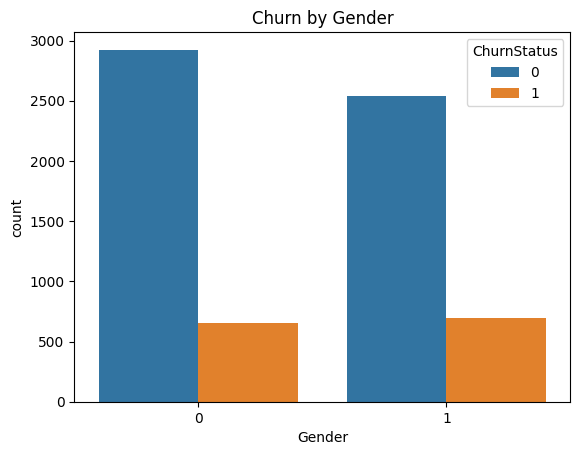

In [428]:
# Churn rate per kategori gender
sns.countplot(data=df_merged, x='Gender', hue='ChurnStatus')
plt.title("Churn by Gender")
plt.show()

male = 1
female = 0

In [429]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib  # untuk menyimpan scaler


In [430]:
# identifikasi kolom ID (CustomerID, TransactionID, InteractionID)
id_cols = [c for c in df_merged.columns if c.lower().endswith('ID')]
target_col = 'ChurnStatus'

# exclude juga kolom datetime
date_cols = df_merged.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# pilih kolom numerik otomatis
num_cols_all = df_merged.select_dtypes(include=['int64','float64']).columns.tolist()

# final numeric columns to scale (exclude IDs & target)
num_cols = [c for c in num_cols_all if c not in id_cols + [target_col]]
print("Numeric columns to scale:", num_cols)


Numeric columns to scale: ['CustomerID', 'Age', 'TransactionID', 'AmountSpent', 'InteractionID', 'LoginFrequency']


In [431]:
# flag has interaction
df_merged['HasInteraction'] = df_merged['InteractionID'].notnull().astype(int)

# recency features (pakai reference date = max TransactionDate)
ref_date = df_merged['TransactionDate'].max()
df_merged['DaysSinceLastLogin'] = (ref_date - df_merged['LastLoginDate']).dt.days
df_merged['DaysSinceLastInteraction'] = (ref_date - df_merged['InteractionDate']).dt.days
# isi NaN (tidak pernah interaksi) dengan nilai besar (mis. 999) atau biarkan NaN lalu impute
df_merged['DaysSinceLastInteraction'] = df_merged['DaysSinceLastInteraction'].fillna(999)


In [432]:
X = df_merged.drop(columns=['ChurnStatus'])
y = df_merged['ChurnStatus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [433]:
num_imputer = SimpleImputer(strategy='median')

# fit imputer di train numeric
X_train_num = X_train[num_cols]
X_train_num_imputed = num_imputer.fit_transform(X_train_num)

# transform test numeric
X_test_num = X_test[num_cols]
X_test_num_imputed = num_imputer.transform(X_test_num)


In [434]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

# masukkan kembali ke dataframe salinan agar gampang dipakai
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = X_train_num_scaled

X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = X_test_num_scaled


In [435]:
import numpy as np

train_means = np.mean(X_train_scaled[num_cols], axis=0)
train_stds  = np.std(X_train_scaled[num_cols], axis=0)
pd.DataFrame({'mean': train_means, 'std': train_stds}, index=num_cols)


,mean,std
CustomerID,-9.910304e-17,1.0
Age,-2.171139e-16,1.0
TransactionID,1.825582e-17,1.0
AmountSpent,2.607975e-17,1.0
InteractionID,-2.738374e-17,1.0
LoginFrequency,-1.193148e-16,1.0


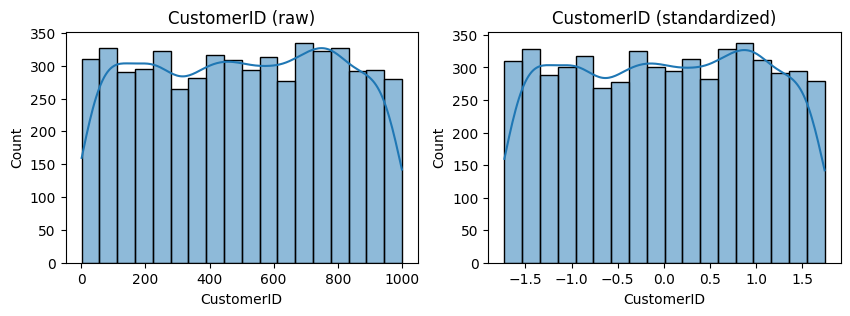

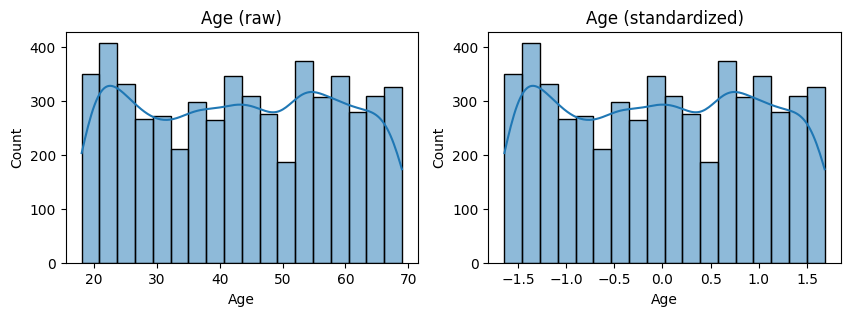

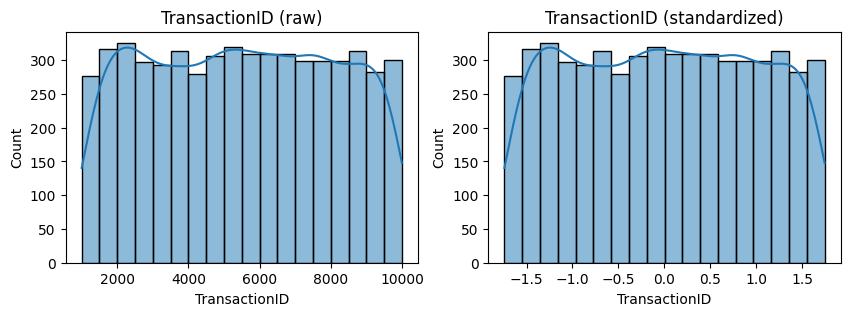

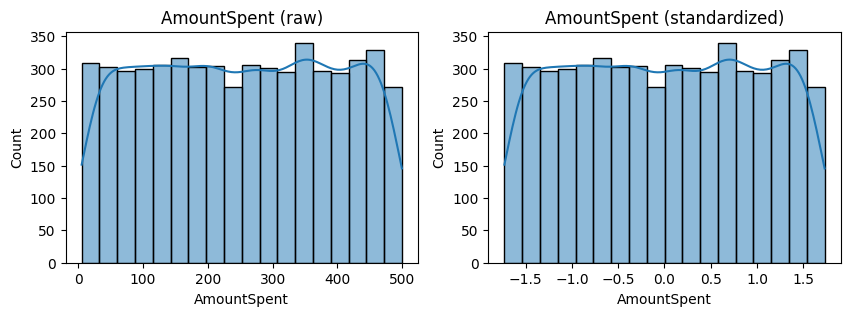

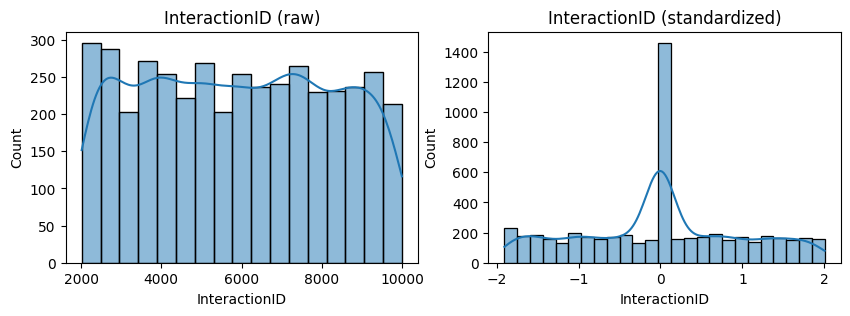

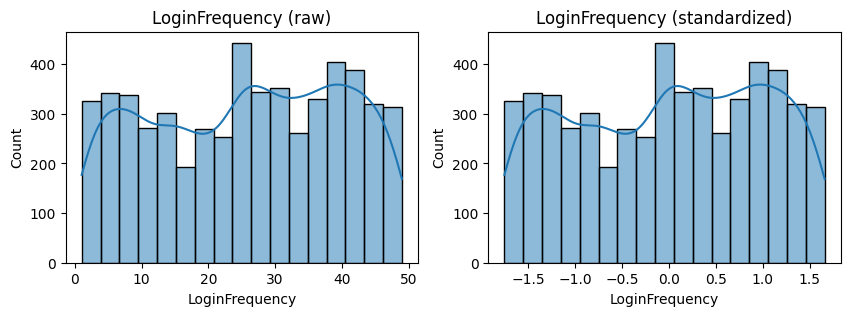

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(X_train[col], ax=ax[0], kde=True).set_title(f'{col} (raw)')
    sns.histplot(X_train_scaled[col], ax=ax[1], kde=True).set_title(f'{col} (standardized)')
    plt.show()


In [437]:
joblib.dump(num_imputer, 'num_imputer.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')


['standard_scaler.pkl']

In [438]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                6812 non-null   int64         
 1   Age                       6812 non-null   int64         
 2   Gender                    6812 non-null   int32         
 3   MaritalStatus             6812 non-null   int32         
 4   IncomeLevel               6812 non-null   int32         
 5   TransactionID             6812 non-null   int64         
 6   TransactionDate           6812 non-null   datetime64[ns]
 7   AmountSpent               6812 non-null   float64       
 8   ProductCategory           6812 non-null   int32         
 9   InteractionID             5204 non-null   float64       
 10  InteractionDate           5204 non-null   datetime64[ns]
 11  InteractionType           6812 non-null   int32         
 12  ResolutionStatus    

In [439]:
df = df_merged

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                6812 non-null   int64         
 1   Age                       6812 non-null   int64         
 2   Gender                    6812 non-null   int32         
 3   MaritalStatus             6812 non-null   int32         
 4   IncomeLevel               6812 non-null   int32         
 5   TransactionID             6812 non-null   int64         
 6   TransactionDate           6812 non-null   datetime64[ns]
 7   AmountSpent               6812 non-null   float64       
 8   ProductCategory           6812 non-null   int32         
 9   InteractionID             5204 non-null   float64       
 10  InteractionDate           5204 non-null   datetime64[ns]
 11  InteractionType           6812 non-null   int32         
 12  ResolutionStatus    

In [441]:
df.isnull()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction,DaysSinceLastLogin,DaysSinceLastInteraction
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
6808,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
6809,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
6810,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [442]:
df.drop(['InteractionID', 'InteractionDate'], axis=1, errors='ignore', inplace=True)
print(df)

      CustomerID  Age  Gender  MaritalStatus  IncomeLevel  TransactionID  \
0              1   62       1              2            1           7194   
1              2   65       1              1            1           7250   
2              2   65       1              1            1           9660   
3              2   65       1              1            1           2998   
4              2   65       1              1            1           1228   
...          ...  ...     ...            ...          ...            ...   
6807        1000   34       1              3            1           2724   
6808        1000   34       1              3            1           2917   
6809        1000   34       1              3            1           2979   
6810        1000   34       1              3            1           8594   
6811        1000   34       1              3            1           5529   

     TransactionDate  AmountSpent  ProductCategory  InteractionType  \
0         2022-0

In [443]:
df.isnull()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction,DaysSinceLastLogin,DaysSinceLastInteraction
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6808,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6809,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6810,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [444]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [445]:
# Pisahkan fitur dengan variable target
X = df.drop('ChurnStatus', axis=1)
y = df['ChurnStatus']

In [446]:
# Drop kolom yang bertipe DateTime
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
X = X.drop(columns=datetime_cols)

In [447]:
# 2. Pastikan semua kolom numeric
X = X.select_dtypes(include=['int64', 'float64'])

In [448]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [469]:
# Cek distribusi kelas
df['ChurnStatus'].value_counts()

# Persentase tiap kelas
df['ChurnStatus'].value_counts(normalize=True) * 100


ChurnStatus
0    80.152672
1    19.847328
Name: proportion, dtype: float64

In [470]:
# X, y sudah disiapkan (encoding & cleaning sudah dilakukan)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [471]:
# Melatih Random Forest before imbalance data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [472]:
# Prediction
y_pred = rf.predict(X_test)

# prediksi probabilitas (kelas positif)
y_proba = rf.predict_proba(X_test)[:, 1]

In [473]:
# classification report before imbalance data
print("classification Report:")
print(classification_report(y_test, y_pred))

classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1092
           1       1.00      0.93      0.96       271

    accuracy                           0.99      1363
   macro avg       0.99      0.96      0.98      1363
weighted avg       0.99      0.99      0.99      1363



In [474]:
# confusion matrix before imblance data
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[1092    0]
 [  20  251]]


In [475]:
# Evaluation ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9990


In [476]:
from imblearn.under_sampling import RandomUnderSampler

# menangani data imbalance dengan Random undersampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [477]:
print("Before: ", y_train.value_counts())
print("After: ", y_train_res.value_counts())

Before:  ChurnStatus
0    4368
1    1081
Name: count, dtype: int64
After:  ChurnStatus
0    1081
1    1081
Name: count, dtype: int64


In [478]:
# Melatih Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [479]:
# Prediction randoundersaampler
y_pred_res = rf.predict(X_test)

# prediksi probabilitas (kelas positif)
y_proba = rf.predict_proba(X_test)[:, 1]

In [480]:
# Prediction
y_pred = rf.predict(X_test)

# prediksi probabilitas (kelas positif)
y_proba = rf.predict_proba(X_test)[:, 1]

In [481]:
# classification report randomundersampler
print("classification Report:")
print(classification_report(y_test, y_pred))

classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1092
           1       0.87      0.94      0.90       271

    accuracy                           0.96      1363
   macro avg       0.93      0.95      0.94      1363
weighted avg       0.96      0.96      0.96      1363



In [482]:
# confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[1053   39]
 [  17  254]]


In [483]:
# Evaluation ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9926


In [484]:
# 7. Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20)

CustomerID                  0.193134
DaysSinceLastLogin          0.190722
LoginFrequency              0.167678
Age                         0.158403
DaysSinceLastInteraction    0.129518
TransactionID               0.081425
AmountSpent                 0.079119
dtype: float64

In [485]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

pipeline = ImbPipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_dist = {
    'clf__n_estimators': [100,200],
    'clf__max_depth': [None, 10, 20]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs = RandomizedSearchCV(pipeline, param_dist, n_iter=6, scoring='roc_auc', cv=cv, n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)

print("Best params:", rs.best_params_)
best_model = rs.best_estimator_

Best params: {'clf__n_estimators': 200, 'clf__max_depth': None}


In [486]:
# evaluasi pada test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1092
           1       0.84      0.95      0.89       271

    accuracy                           0.95      1363
   macro avg       0.91      0.95      0.93      1363
weighted avg       0.96      0.95      0.95      1363

ROC AUC: 0.9916906586648285


In [467]:
# Misalnya X adalah DataFrame fitur
jumlah_fitur = X.shape[1]
print("Jumlah fitur yang digunakan:", jumlah_fitur)

Jumlah fitur yang digunakan: 7
